In [3]:
import numpy as np
import matplotlib.pyplot as plt

#  归一化、标准化


* `MinMaxScaler` **Min-Max归一化** (Max-Min Normalization)
$$
 \frac{x - \min(x)}{\max(x) - \min(x)}
$$


* `StandardScaler`  **标准化**(Standardization), **中心标准化**(Z-score normalization) 
$$
z = \frac{x - \mathrm{mean}({x})}{\mathrm{sd}(x)}
$$

* `RobustScaler`
$$
z_{Robust} = \frac{x - \mathrm{median}({x})}{\mathrm{IQR}(x)}
$$

* `Normalizer`
将数据向量转换成单位向量(模长度为1的向量)



In [5]:
import scipy.stats as stats
stats.norm.cdf(0.5) - stats.norm.cdf(-0.5)

np.float64(0.38292492254802624)

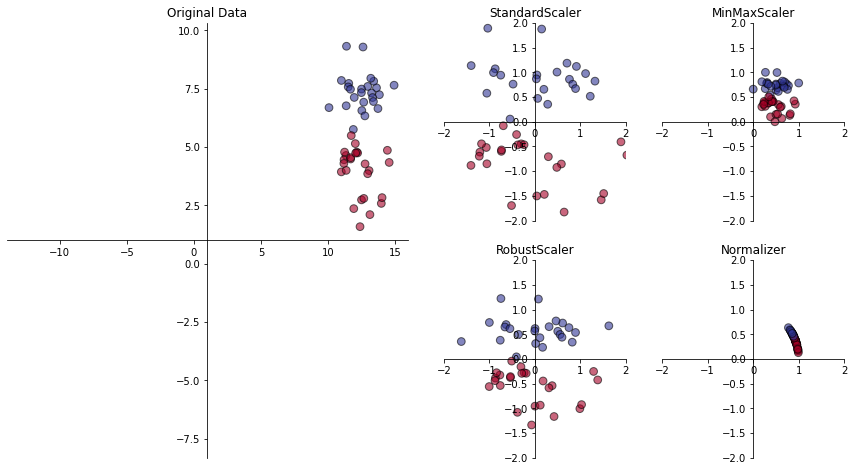

In [69]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler,  RobustScaler
def plot_scaling():
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3

    plt.figure(figsize=(15, 8))
    main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,  ec="k", alpha=0.6, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()

    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Original Data")
    other_axes = [plt.subplot2grid((2, 4), (i, j))
                  for j in range(2, 4) for i in range(2)]

    for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                       MinMaxScaler(), Normalizer(norm='l2')]):
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=plt.cm.RdYlBu, ec="k", alpha=0.6, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)

    other_axes.append(main_ax)

    for ax in other_axes:
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

plot_scaling()

### 2. 非线性变换

* **分位函数变换**（QuantileTransformer）

类`QuantileTransformer`提供一种基于分位数函数的无参数变换，将数据映射到一个取值在0到1之间的均匀分布或标准正态分布。该变换通过序（rank）变换, 能够将异常数据分布变得平滑， 不容易受到极端值的影响。但是，这种变换打乱特征间的关联及特征内的距离。

> ```python
transformer = QuantileTransformer(n_quantiles=200, 
                                  output_distribution='normal')
transformer.fit(X)
transformer.transform(X)
>```

* **幂变换** （PowerTransformer）

在许多建模场景中，需要特征满足正态化(normality)。幂变换(Power transforms)是提供**单调变换**， 
其目的是将数据从任何分布映射到尽可能接近正态分布，以获得稳定的方差和最小化偏斜(skewness)。

类`PowerTransformer`提供两种幂变换：Yeo-Johnson transform和the Box-Cox transform。

    1. Yeo-Johnson变换
$$
    \begin{split}x^{(\lambda)} =
    \begin{cases}
    \frac{(1 + x)^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, x \geq 0, \\[8pt]
    \ln{(1+x)} & \text{if } \lambda = 0, x \geq 0 \\[8pt]
    \frac{1-(1-x)^{2 - \lambda}}{2 - \lambda} & \text{if } \lambda \neq 2, x < 0, \\[8pt]
     - \ln (1 - x) & \text{if } \lambda = 2, x < 0
    \end{cases}\end{split}
$$

    2. Box-Cox变换
$$
\begin{split}x_i^{(\lambda)} =
\begin{cases}
\dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(x_i)} & \text{if } \lambda = 0,
\end{cases}\end{split}
$$

变换通过极大似然估计求解变换的最优的参数$\lambda$，使得数据偏度最小和方差变得稳定。Box-Cox与Yeo-Johnson变换一个重要区别就是，Box-Cox变换输入的数据只能是正的，而Yeo-Johnson变换正负都可以.

>```python
transformer = PowerTransformer(method='box-cox')
transformer.fit(X)
transformer.transform(X)
>```


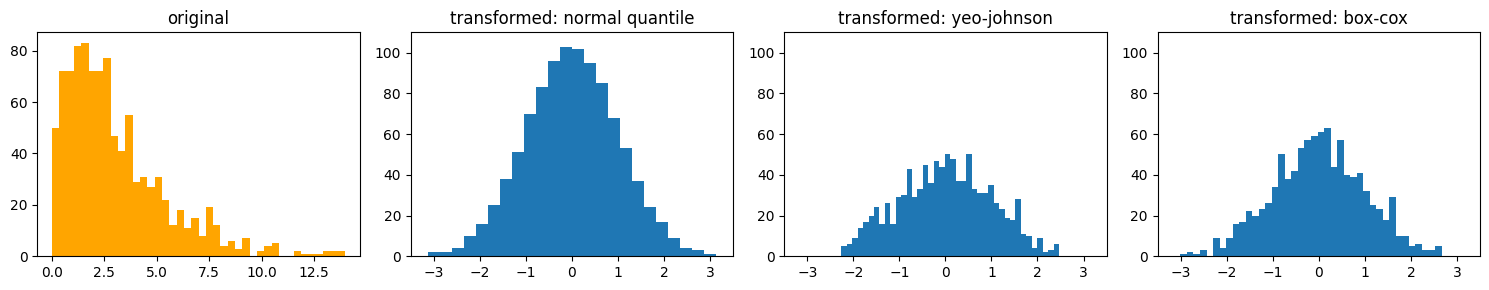

In [68]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(42)

X_chisq = rng.chisquare(df=3, size=(1000, 1))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), dpi=100)
ax = axes[0]
ax.hist(X_chisq, bins=40, color="orange");
ax.set_title("original")

ax = axes[1]
transformer = QuantileTransformer(n_quantiles=200, 
                                  output_distribution='normal',
                                  random_state=rng)
ax.hist(transformer.fit(X_chisq).transform(X_chisq), bins=40);
ax.set_xlim(-3.5, 3.5); ax.set_ylim(0, 110)
ax.set_title("transformed: normal quantile")

ax = axes[2]
transformer = PowerTransformer(method='yeo-johnson')
ax.hist(transformer.fit(X_chisq).transform(X_chisq), bins=40);
ax.set_xlim(-3.5, 3.5); ax.set_ylim(0, 110)
ax.set_title("transformed: yeo-johnson")

ax = axes[3]
transformer = PowerTransformer(method='box-cox')
ax.hist(transformer.fit(X_chisq).transform(X_chisq), bins=40);
ax.set_xlim(-3.5, 3.5); ax.set_ylim(0, 110)
ax.set_title("transformed: box-cox")


plt.tight_layout()

# Applying Data Transformations

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

训练集和测试集必须使用相同的伸缩变换

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test) # ERROR!!!
X_test_scaled  = scaler.transform(X_test)

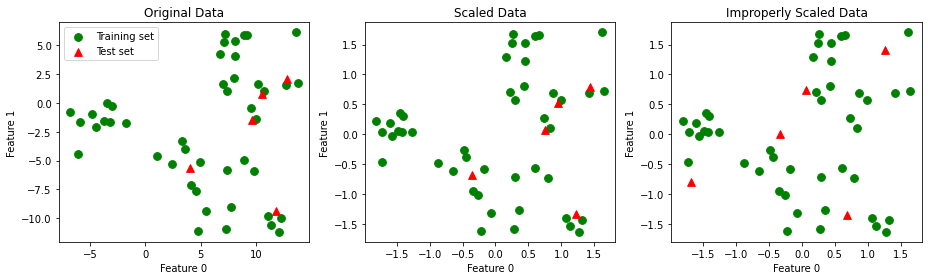

In [6]:
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c="green", label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c="red", label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

scaler = PowerTransformer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c="green", label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c="red", label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = PowerTransformer()
test_scaler.fit(X_test)
test_scaler.transform(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c="green", label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c="red", label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()